<a href="https://colab.research.google.com/github/parthchittawar/Machine-Learning/blob/main/09_SkimLit_nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: SkimLit 🔥

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c8a2f044-8d66-295c-4f6c-ff3dc31abfdd)


In [ ]:
## Get Data

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what  files are in PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT

dev.txt  test.txt  train.txt


In [ ]:
# Start our experiments on 20K datasets with  numbers replaced by @ sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Prerpocessing the data

In [ ]:
# create afunction to read the lines of the document

def get_lines(filename):
  """
  reads filename and returns the lines of text as a list
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# read in training lines
train_lines = get_lines(data_dir+"train.txt")  # read the lines within the training files
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

How our data would look like...
we need to create a list of dictionaries 

eg-
```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': "to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .",
  'total_lines': 11},
  ...]
  ```

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename)     # get all lines from file name
  abstract_lines = ""     # create an empty abstract
  abstract_samples = []    # create an empty list of abstracts

  # loop through each line in target file
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""  # reset the abstract string if the line is ID line
    elif line.isspace():   # check to see if the line is a new line
        abstract_line_split = abstract_lines.splitlines()    # split abstract into seperate lines

        # Iterate through each line in a single abstract and count them at the same time
        for abstract_line_number, abstract_line in enumerate(abstract_line_split):
           line_data = {}   # create a empty dictionary for each line
           target_text_split = abstract_line.split("\t")  # split target label from text
           line_data["target"] = target_text_split[0]     # get target label
           line_data["text"] = target_text_split[1].lower()   # get target text and lower it
           line_data["line_number"] = abstract_line_number   # what number does the line appear
           line_data["total_lines"] = len(abstract_line_split) - 1  #  how mmany total lines are there in target abstract
           abstract_samples.append(line_data)    # add line data to abstract samples
    
    else: # if the above conditions aren't  fulfilled, the line contains a labelled sentence
      abstract_lines += line
  return abstract_samples
    


In [ ]:
# get the data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")  # dev is another name for validation dataset
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 430 ms, sys: 82.3 ms, total: 512 ms
Wall time: 512 ms


In [ ]:
# check the first abstract of our training data
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

now our data is in the  form of list of dictionaries, we will turn it 
into a dataframe to further visualize it

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

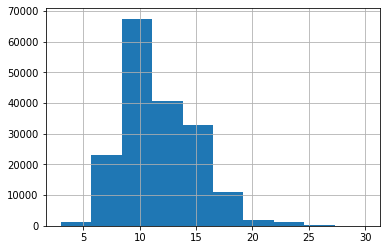

In [ ]:
train_df.total_lines.hist();

### Get list of sentences

In [ ]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make nummeric labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)  # we want a non sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))


train_labels_one_hot
val_labels_one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Encode Labels

In [ ]:
# Extract labels and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# get class names and number of classes from label encoder instannce
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

###Model0 : Baseline model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 

model_0 = Pipeline([
                    
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])


model_0.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,
                 val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-15 08:39:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-15 08:39:52 (92.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results= calculate_results(val_labels_encoded,
                                    baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Preparing our data for deep sequence models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
#how long is the sentence on an average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <a list of 20 Patch objects>)

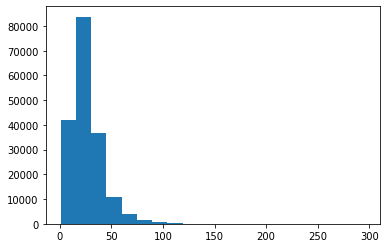

In [ ]:
# what does the distribution looks like
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

In [ ]:
# how long of a sentence length cover 95% of examples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
# maximum sentence length in training set
max(sent_lens)

296

### Create a text vectorization layer

In [ ]:
# how many tokens are there in our vocab (taken from the paper)
max_tokens = 68000

In [ ]:
# creating text vectorization layer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens,    # number of words in vocabuary
                                    output_sequence_length=output_seq_len,    # desired output length of vectorized sequences
                                    )

In [ ]:
# adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# TEst  out text vectorizer on random sentences
import random 
target_sentence = random.choice(train_sentences)
print(f"Text:\n {target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())} ")
print(f"\n vectorized text: {text_vectorizer([target_sentence])}")

Text:
 to determine the effect of active recovery ( ar ) , passive rest ( pr ) , and cold-water immersion ( cwi ) after @ min of intensive cycling on a subsequent @-min time trial ( tt@ ) and the applied pacing strategy in tt@ .

Length of text: 46 

 vectorized text: [[    6   228     2    70     4   327   393  3020  2241  1240  2021     3
  27072  8258  5296    21   242     4   642  2978    18     8   852   242
     63    32  2017     3     2   551  2343   606     5  2017     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# how many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

### Create custom text embedding

In [ ]:
# create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of our vocabulary
                               output_dim=128,  ## Note: different embedding sizes result in drastically different numbers of parameters to train
                               mask_zero=False,  # Use masking to handle variable sequence lengths (save space)
                               name="token_embedding"
                               )

In [ ]:
print(f"Sentence before vectorization:\n {target_sentence} \n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization(before embedding): \n {vectorized_sentence} \n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding: \n {embedded_sentence} \n")
print(f"Embedded Sentene Shape {embedded_sentence.shape}")

Sentence before vectorization:
 to determine the effect of active recovery ( ar ) , passive rest ( pr ) , and cold-water immersion ( cwi ) after @ min of intensive cycling on a subsequent @-min time trial ( tt@ ) and the applied pacing strategy in tt@ . 

Sentence after vectorization(before embedding): 
 [[    6   228     2    70     4   327   393  3020  2241  1240  2021     3
  27072  8258  5296    21   242     4   642  2978    18     8   852   242
     63    32  2017     3     2   551  2343   606     5  2017     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]] 

Sentence after embedding: 
 [[[ 0.0295688   0.03703095  0.04509547 ... -0.03415295 -0.02544525
    0.03413042]
  [-0.04451811  0.04123013 -0.01430072 ...  0.01884497  0.01693251
   -0.04576863]
  [-0.04142342 -0.00752521  0.03780491 ... -0.03420714  0.04570985
   -0.04333822]
  ...
  [ 0.00417304 -0.01560267 -0.04040498 ...  0.00019685 -0.04026548


## Creating dataset (make sure our data loads as fast as possible)

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# turn our data into tf datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
# Take tensorflow datasets and turn them into prefetched datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model 1: Conv1d with token embeddings

In [ ]:
import tensorflow as tf
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)   #vvectorize text inputs
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)     # condense the output of our feature vector from conv layer
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

# compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)),    
                              )

Epoch 1/3
562/562 [==============================] - 15s 9ms/step - loss: 0.9099 - accuracy: 0.6418 - val_loss: 0.6795 - val_accuracy: 0.7387
Epoch 2/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6532 - accuracy: 0.7572 - val_loss: 0.6222 - val_accuracy: 0.7743
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6143 - accuracy: 0.7752 - val_loss: 0.5929 - val_accuracy: 0.7866


In [ ]:
# evaluate on whole validation dataset
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5955 - accuracy: 0.7862


[0.5954613089561462, 0.7862438559532166]

In [ ]:
# predictions
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

(array([[4.0161923e-01, 1.5752707e-01, 9.7998872e-02, 3.1357652e-01,
         2.9278375e-02],
        [4.9408728e-01, 2.4060130e-01, 1.3800239e-02, 2.4392749e-01,
         7.5836885e-03],
        [1.4478245e-01, 5.5716401e-03, 1.2342071e-03, 8.4837985e-01,
         3.1715877e-05],
        ...,
        [3.8036428e-06, 4.9303065e-04, 5.6427537e-04, 3.5936175e-06,
         9.9893528e-01],
        [5.7168674e-02, 4.9498373e-01, 9.6580908e-02, 6.9470361e-02,
         2.8179631e-01],
        [1.6876596e-01, 6.7795050e-01, 5.0834063e-02, 3.7666816e-02,
         6.4782687e-02]], dtype=float32), (30212, 5))

In [ ]:
# conver pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
model_1_results =  calculate_results(val_labels_encoded,
                                     model_1_preds)
model_1_results

{'accuracy': 78.62438766053224,
 'f1': 0.7837593202093958,
 'precision': 0.7831714116424382,
 'recall': 0.7862438766053224}

## Model 2: Feature Extraction with pretrained token embeddings

Training our own embeddings took a little while to run, slowing our experiments down.

Since we're moving towards replicating the model architecture in Neural Networks for Joint Sentence Classification in Medical Paper Abstracts, it mentions they used a pretrained GloVe embedding as a way to initialise their token embeddings.

To emulate this, let's see what results we can get with the pretrained Universal Sentence Encoder embeddings from TensorFlow Hub.

In [ ]:
# Download  pretrained tensorflow hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer=  hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test out the pretrained embeddings
random_train_sentence = random.choice(train_sentences)
print(f"Random Sentence: \n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n {use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random Sentence: 
 familial amyloid polyneuropathy , a lethal genetic disease caused by aggregation of variant transthyretin , induces progressive peripheral nerve deficits and disability .
Sentence after embedding:
 [ 0.01189707  0.03047203 -0.00309382  0.02767202 -0.02966786 -0.03283614
  0.01595093 -0.07431369  0.04163621 -0.00870649  0.08068521  0.00472917
 -0.00853594 -0.04329369  0.05537401 -0.0756099  -0.08078472 -0.00218245
 -0.06089266 -0.03277993 -0.04376736  0.00022751  0.02595001  0.01459608
  0.06112276  0.05709133  0.05875318 -0.02007349 -0.04011749  0.03895531]

Length of sentence embedding: 512


### Building and fitting an NLP feature extraction model using pretrained embeddings tensorflow hub

In [ ]:
import tensorflow as tf
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embeddings = tf_hub_embedding_layer(inputs)   # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(128, activation="relu")(pretrained_embeddings)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_USE_feature_extractor")

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit model 2 to the data
history_model_2 = model_2.fit(train_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data = valid_dataset,
                              validation_steps=int(0.1  * len(valid_dataset)),
                              )

Epoch 1/3
562/562 [==============================] - 9s 12ms/step - loss: 0.9138 - accuracy: 0.6545 - val_loss: 0.7978 - val_accuracy: 0.6902
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7715 - accuracy: 0.7000 - val_loss: 0.7573 - val_accuracy: 0.7048
Epoch 3/3
562/562 [==============================] - 6s 12ms/step - loss: 0.7576 - accuracy: 0.7105 - val_loss: 0.7441 - val_accuracy: 0.7118


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 9s 10ms/step - loss: 0.7463 - accuracy: 0.7118


[0.7462631464004517, 0.7118363380432129]

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[3.9761618e-01, 3.9888769e-01, 2.5135011e-03, 1.9269717e-01,
        8.2854778e-03],
       [3.3252206e-01, 5.2131569e-01, 3.6625168e-03, 1.3930984e-01,
        3.1898734e-03],
       [2.0720740e-01, 1.8203086e-01, 1.9754106e-02, 5.4681480e-01,
        4.4192843e-02],
       ...,
       [2.2079775e-03, 5.9625409e-03, 5.2388936e-02, 8.0435787e-04,
        9.3863624e-01],
       [3.8361973e-03, 4.6577837e-02, 2.1710438e-01, 1.4917759e-03,
        7.3098981e-01],
       [1.5270099e-01, 2.6775756e-01, 5.1250976e-01, 5.1734904e-03,
        6.1858192e-02]], dtype=float32)

In [ ]:
# convert the prediction probs
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.18363564146696,
 'f1': 0.7086079309332457,
 'precision': 0.7120895207532288,
 'recall': 0.7118363564146697}

## Model3: Conv1d with character embedding

### Creating a  chracter level tokenizer

In [ ]:
list(train_sentences[0])

['t',
 'o',
 ' ',
 'i',
 'n',
 'v',
 'e',
 's',
 't',
 'i',
 'g',
 'a',
 't',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'e',
 'f',
 'f',
 'i',
 'c',
 'a',
 'c',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 '@',
 ' ',
 'w',
 'e',
 'e',
 'k',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'a',
 'i',
 'l',
 'y',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'd',
 'o',
 's',
 'e',
 ' ',
 'o',
 'r',
 'a',
 'l',
 ' ',
 'p',
 'r',
 'e',
 'd',
 'n',
 'i',
 's',
 'o',
 'l',
 'o',
 'n',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 'm',
 'p',
 'r',
 'o',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'a',
 'i',
 'n',
 ' ',
 ',',
 ' ',
 'm',
 'o',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'g',
 'r',
 'a',
 'd',
 'e',
 ' ',
 'i',
 'n',
 'f',
 'l',
 'a',
 'm',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'h',
 'o',
 'r',
 't',
 ' ',
 't',
 'e',
 'r',
 'm',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'h',
 'e'

In [ ]:
# make functions to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# text splitting a non character level sequence into characters
split_chars(random_train_sentence)


'f a m i l i a l   a m y l o i d   p o l y n e u r o p a t h y   ,   a   l e t h a l   g e n e t i c   d i s e a s e   c a u s e d   b y   a g g r e g a t i o n   o f   v a r i a n t   t r a n s t h y r e t i n   ,   i n d u c e s   p r o g r e s s i v e   p e r i p h e r a l   n e r v e   d e f i c i t s   a n d   d i s a b i l i t y   .'

In [ ]:
# split sequence level data splits into character level splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# what is average chracter length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

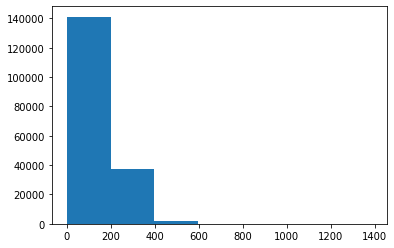

In [ ]:
# check the distribution of our sequences at a character level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
# Get all keyborad characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# chrate char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for " " and OOV token (OOV= out of vocab, [UNK])
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    name="char_vectorizer")

In [ ]:
# adapt char vectorizer to training chras
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"NUmber of diffrent characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]} ")

NUmber of diffrent characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j'] 


In [ ]:
#vectorized_chars

In [ ]:
#random_train_chars

In [ ]:
#test the char vectorizer
random_train_chars = random.choice(train_chars)
print(f"charified text:\n {random_train_chars} ")
print(f"\nlength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nvectorized chars:\n {vectorized_chars}")
print(f"\nlength of vectorized chars:\n {len(vectorized_chars[0])}")

charified text:
 n e i t h e r   l i f e s t y l e   c h a n g e s   n o r   r e d   w i n e   h a d   a n   e f f e c t   o n   p e a k   s y s t o l i c   ,   p e a k   e n d - d i a s t o l i c   o r   m e a n   c e r e b r a l   b l o o d   f l o w   v e l o c i t y   . 

length of random_train_chars: 108

vectorized chars:
 [[ 6  2  4  3 13  2  8 12  4 17  2  9  3 19 12  2 11 13  5  6 18  2  9  6
   7  8  8  2 10 20  4  6  2 13  5 10  5  6  2 17 17  2 11  3  7  6 14  2
   5 23  9 19  9  3  7 12  4 11 14  2  5 23  2  6 10 10  4  5  9  3  7 12
   4 11  7  8 15  2  5  6 11  2  8  2 22  8  5 12 22 12  7  7 10 17 12  7
  20 21  2 12  7 11  4  3 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   

### Creating a character-level embedding 

In [ ]:
char_embed = layers.Embedding(input_dim=len(char_vocab), # number of diffrent characters in vocab
                              output_dim=25,   # this is the size of char embeddng from the paper
                              mask_zero=False,
                              name="char_embed")

In [ ]:
random_train_chars

'n e i t h e r   l i f e s t y l e   c h a n g e s   n o r   r e d   w i n e   h a d   a n   e f f e c t   o n   p e a k   s y s t o l i c   ,   p e a k   e n d - d i a s t o l i c   o r   m e a n   c e r e b r a l   b l o o d   f l o w   v e l o c i t y   .'

In [ ]:
print(f"charified text: \n {random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"embedded chars. after vectorizaton and embedding: \n {char_embed_example}")
print(f"char embedding shape: \n {char_embed_example.shape}")

charified text: 
 n e i t h e r   l i f e s t y l e   c h a n g e s   n o r   r e d   w i n e   h a d   a n   e f f e c t   o n   p e a k   s y s t o l i c   ,   p e a k   e n d - d i a s t o l i c   o r   m e a n   c e r e b r a l   b l o o d   f l o w   v e l o c i t y   .

embedded chars. after vectorizaton and embedding: 
 [[[-0.02206484 -0.02532843  0.04470548 ...  0.00153251 -0.01430099
    0.01096781]
  [ 0.01493925  0.02789427  0.02931396 ... -0.0282259   0.04000611
   -0.04705968]
  [-0.04983683 -0.04420421  0.04813704 ... -0.04027199  0.01418418
    0.00306179]
  ...
  [-0.02944303 -0.03019856 -0.04532825 ...  0.04103151 -0.04334396
    0.02356451]
  [-0.02944303 -0.03019856 -0.04532825 ...  0.04103151 -0.04334396
    0.02356451]
  [-0.02944303 -0.03019856 -0.04532825 ...  0.04103151 -0.04334396
    0.02356451]]]
char embedding shape: 
 (1, 290, 25)


### Building a conv1d to fit on character embeddings

In [ ]:
# make conv 1d on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1d_char_embeddings")

# compile
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_conv1d_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 

In [ ]:
# create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
# fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data = val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 5ms/step - loss: 1.2451 - accuracy: 0.4952 - val_loss: 1.0263 - val_accuracy: 0.5844
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9966 - accuracy: 0.6012 - val_loss: 0.9374 - val_accuracy: 0.6243
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9254 - accuracy: 0.6388 - val_loss: 0.8661 - val_accuracy: 0.6636


In [ ]:
# make predictions with charcter model
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.23232761, 0.2358778 , 0.14910978, 0.3503087 , 0.03237618],
       [0.17600091, 0.6646682 , 0.00999265, 0.07670652, 0.07263174],
       [0.09406432, 0.20925759, 0.17352039, 0.49380505, 0.02935268],
       ...,
       [0.01776245, 0.04404938, 0.32620466, 0.03026475, 0.58171874],
       [0.02613626, 0.1520017 , 0.5485394 , 0.0264417 , 0.24688101],
       [0.5051426 , 0.3169632 , 0.05192548, 0.11004523, 0.01592351]],
      dtype=float32)

In [ ]:
# conver to class labels
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 2, 0])>

In [ ]:
# calculate results for conv1d model char
model_3_results =  calculate_results(y_true=val_labels_encoded,
                                     y_pred=model_3_preds)
model_3_results

{'accuracy': 65.63286111478882,
 'f1': 0.646358197646848,
 'precision': 0.6475070276169437,
 'recall': 0.6563286111478882}

In [ ]:
model_2_results

{'accuracy': 71.18363564146696,
 'f1': 0.7086079309332457,
 'precision': 0.7120895207532288,
 'recall': 0.7118363564146697}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [ ]:
model_1_results

{'accuracy': 78.62438766053224,
 'f1': 0.7837593202093958,
 'precision': 0.7831714116424382,
 'recall': 0.7862438766053224}

## Model 4: Combining pretrained token embedding and character embedding
(hybrid embedding layer)

In [ ]:
# step1 token inputs/model
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embedding = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embedding)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# step2 setupt char inputs/model
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) # bi-lstm shown in the figure
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# step3 concatenate token and char inputs (create hybrid token embedding) 
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

#  stp4 create output layers- adding in dropout, discussed in section
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)


# step5construct a model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embedding")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['

In [ ]:
import keras

In [ ]:
# plot hybrid token and char model
#from tf.keras.utils import plot_model
#plot_model(model_4)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### Combining token and character data into a tf.data.Dataset

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset =  tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))  #combine data aand labels

# prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#repeat above steps for validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset =  tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

### Fitting a model on token and character-level sequences

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 23s 33ms/step - loss: 0.9902 - accuracy: 0.6072 - val_loss: 0.7878 - val_accuracy: 0.6948
Epoch 2/3
562/562 [==============================] - 17s 31ms/step - loss: 0.8057 - accuracy: 0.6902 - val_loss: 0.7213 - val_accuracy: 0.7287
Epoch 3/3
562/562 [==============================] - 17s 31ms/step - loss: 0.7775 - accuracy: 0.7029 - val_loss: 0.6951 - val_accuracy: 0.7380


In [ ]:
model_2_results

{'accuracy': 71.18363564146696,
 'f1': 0.7086079309332457,
 'precision': 0.7120895207532288,
 'recall': 0.7118363564146697}

In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.7011 - accuracy: 0.7327


[0.7010655999183655, 0.7326890230178833]

In [ ]:
# make predictions
model_4_pred_probs = model_4.predict(val_char_token_dataset)

In [ ]:
model_4_pred_probs

array([[4.3365511e-01, 3.7044990e-01, 4.7848499e-03, 1.8120399e-01,
        9.9061318e-03],
       [3.2440951e-01, 4.5888722e-01, 3.3608479e-03, 2.1124226e-01,
        2.1001352e-03],
       [3.1519318e-01, 1.3834874e-01, 4.3396287e-02, 4.6763101e-01,
        3.5430811e-02],
       ...,
       [5.4626382e-04, 7.4403444e-03, 6.9067560e-02, 1.3506440e-04,
        9.2281073e-01],
       [5.9047984e-03, 4.7395669e-02, 2.3008034e-01, 2.4722894e-03,
        7.1414691e-01],
       [1.8915142e-01, 3.5117304e-01, 3.4978142e-01, 3.1987309e-02,
        7.7906892e-02]], dtype=float32)

In [ ]:
# convert probs into labels
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
# model 4 token-char hybrid results
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.26889977492387,
 'f1': 0.7296601423762175,
 'precision': 0.7333750761588699,
 'recall': 0.7326889977492387}

In [ ]:
model_1_results

{'accuracy': 78.62438766053224,
 'f1': 0.7837593202093958,
 'precision': 0.7831714116424382,
 'recall': 0.7862438766053224}

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [ ]:
### Create positional embeddings

In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

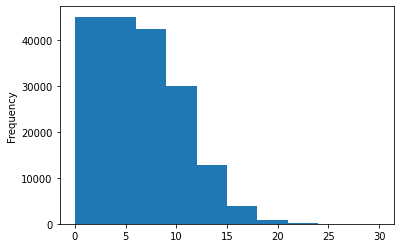

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180040, 15]))

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

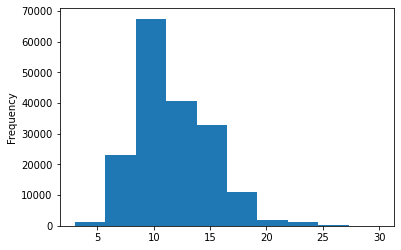

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
# what  length covers 95% of our abstract strings
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
# use tensorflow to create one-hot-encoded tensors of our total_lines features
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

### Building a tribrid embedding model

It's time to build the biggest model we've built yet. One which incorporates token embeddings, character embeddings and our newly crafted positional embeddings.

We'll be venturing into uncovered territory but there will be nothing here you haven't practiced before.

More specifically we're going to go through the following steps:

Create a token-level model (similar to model_1)

Create a character-level model (similar to model_3 with a slight modification to reflect the paper)

Create a "line_number" model (takes in one-hot-encoded "line_number" tensor and passes it through a non-linear layer)

Create a "total_lines" model (takes in one-hot-encoded "total_lines" tensor and passes it through a non-linear layer)

Combine (using layers.Concatenate) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts

Combine (using layers.Concatenate) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding

Create an output layer to accept the tribrid embedding and output predicted label probabilities

Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a tf.keras.Model


In [ ]:
# token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# line numbers model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_inputs")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)
# total lines model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name="total_lines_inputs")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(inputs=total_lines_inputs,
                                   outputs=y)

# combine token and char embedding into hybrid embedding
combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                              char_model.output])

z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# combine positional embedding with combined token and char embedding
tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")([line_number_model.output,
                                                                                 total_lines_model.output,
                                                                                 z])

output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embeddings)

# putting all together
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="model_5_tribrid_embedding_model")

In [ ]:
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['t

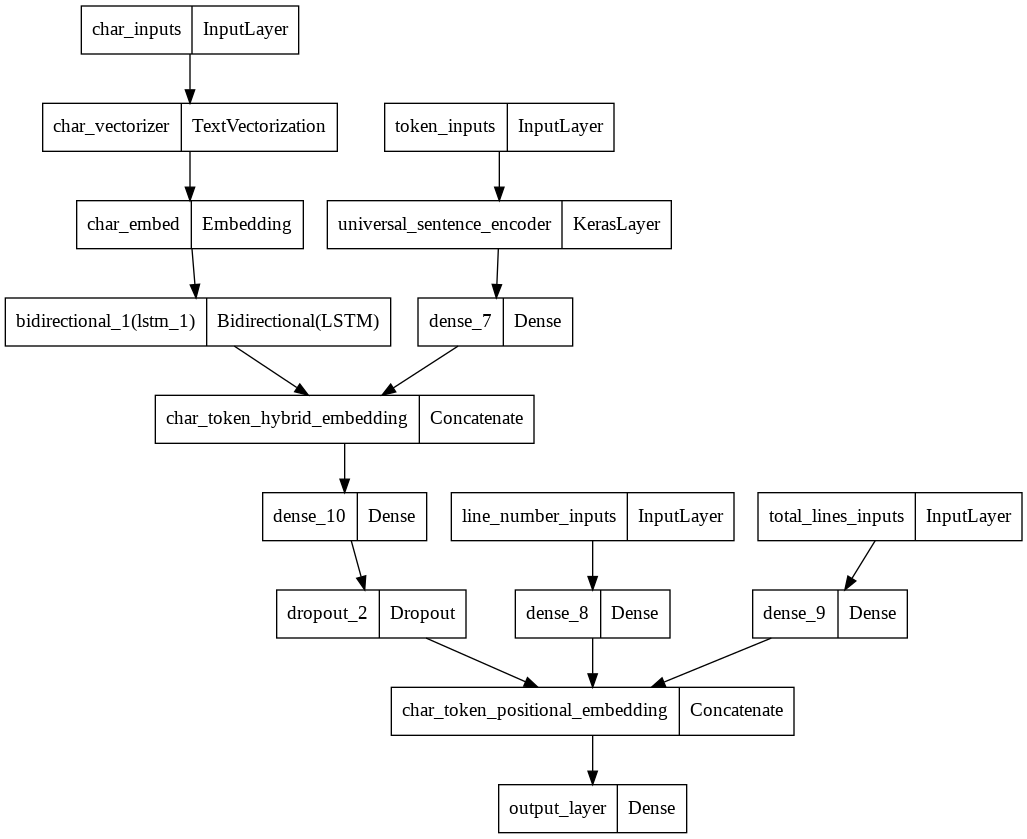

In [ ]:
#plot model_5 to explore it visually
#plot model_5 to explore it visually
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Now our model is constructed, let's compile it.

This time, we're going to introduce a new parameter to our loss function called label_smoothing. Label smoothing helps to regularize our model (prevent overfitting) by making sure it doesn't get too focused on applying one particular label to a sample.

For example, instead of having an output prediction of:

[0.0, 0.0, 1.0, 0.0, 0.0] for a sample (the model is very confident the right label is index 2).
It's predictions will get smoothed to be something like:

[0.01, 0.01, 0.096, 0.01, 0.01] giving a small activation to each of the other labels, in turn, hopefully improving generalization.


In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Create tribrid embedding datasets using tf.data.datasets

In [ ]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, #line numbers
                                                                train_total_lines_one_hot,  # total lines
                                                                train_sentences,   #  train_tokens
                                                                train_chars))    # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)  # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, #line numbers
                                                                val_total_lines_one_hot,  # total lines
                                                                val_sentences,   #  train_tokens
                                                                val_chars))    # train chars
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)  # train labels
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# check input shape
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

### Fitting, evaluating and making predictions with our tribrid model

In [ ]:
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset)

Epoch 1/3
562/562 [==============================] - 37s 60ms/step - loss: 1.0931 - accuracy: 0.7259 - val_loss: 0.9798 - val_accuracy: 0.8019
Epoch 2/3
562/562 [==============================] - 33s 58ms/step - loss: 0.9667 - accuracy: 0.8157 - val_loss: 0.9507 - val_accuracy: 0.8205
Epoch 3/3
562/562 [==============================] - 33s 58ms/step - loss: 0.9499 - accuracy: 0.8245 - val_loss: 0.9354 - val_accuracy: 0.8323


In [ ]:
model_5.evaluate(val_pos_char_token_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.9354 - accuracy: 0.8323


[0.9354358911514282, 0.8323183059692383]

In [ ]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 18s 19ms/step


array([[0.52269   , 0.11031801, 0.01179755, 0.3385705 , 0.0166239 ],
       [0.5724085 , 0.08441897, 0.03786006, 0.2952403 , 0.01007219],
       [0.27567962, 0.10642132, 0.14307317, 0.4054939 , 0.06933194],
       ...,
       [0.03648024, 0.11234417, 0.0447898 , 0.0351974 , 0.7711884 ],
       [0.03194115, 0.33690968, 0.06852257, 0.02375201, 0.5388746 ],
       [0.16477558, 0.65235364, 0.08352213, 0.03742686, 0.06192177]],
      dtype=float32)

In [ ]:
# covert it into pred labels
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# calculate the results
model_5_results  = calculate_results(val_labels_encoded, model_5_preds )

In [ ]:
model_5_results

{'accuracy': 83.2318284125513,
 'f1': 0.8312118525342701,
 'precision': 0.8311965121967809,
 'recall': 0.832318284125513}

In [ ]:
model_4_results

{'accuracy': 73.26889977492387,
 'f1': 0.7296601423762175,
 'precision': 0.7333750761588699,
 'recall': 0.7326889977492387}

## Compare model results

In [ ]:
# combine model results into a dataframe
all_model_results = pd.DataFrame({"model_0_baseline": baseline_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_token_char_ebedding": model_4_results,
                                  "model_5_pos_char_token_embedding": model_5_results})

all_model_results 

,model_0_baseline,model_1_custom_token_embedding,model_2_pretrained_token_embedding,model_3_custom_char_embedding,model_4_hybrid_token_char_ebedding,model_5_pos_char_token_embedding
accuracy,72.183238,78.624388,71.183636,65.632861,73.268900,83.231828
precision,0.718647,0.783171,0.712090,0.647507,0.733375,0.831197
recall,0.721832,0.786244,0.711836,0.656329,0.732689,0.832318
f1,0.698925,0.783759,0.708608,0.646358,0.729660,0.831212


In [ ]:
all_model_results = all_model_results.transpose()

In [ ]:
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.624388,0.783171,0.786244,0.783759
model_2_pretrained_token_embedding,71.183636,0.712090,0.711836,0.708608
model_3_custom_char_embedding,65.632861,0.647507,0.656329,0.646358
model_4_hybrid_token_char_ebedding,73.268900,0.733375,0.732689,0.729660
model_5_pos_char_token_embedding,83.231828,0.831197,0.832318,0.831212


In [ ]:
# Reduce the accuracy to the same scale as that of the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

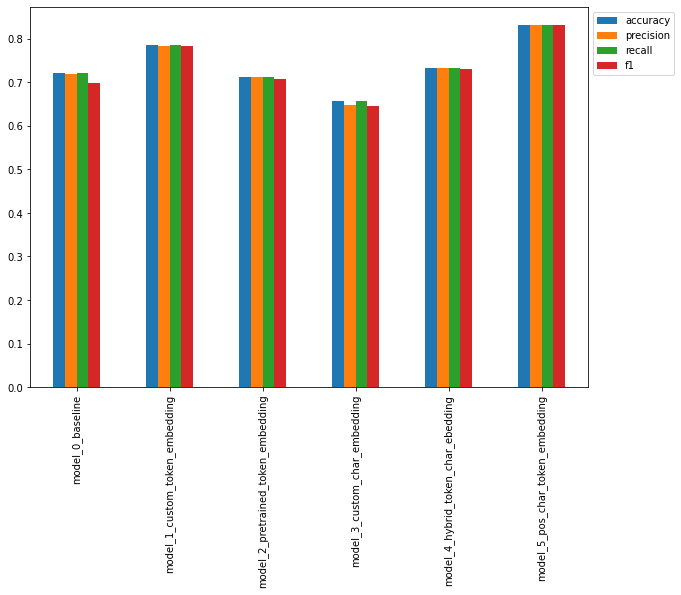

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

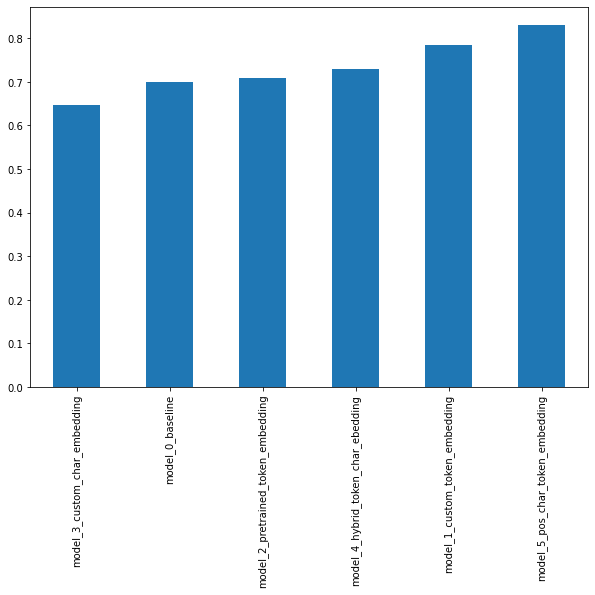

In [ ]:
# sort the values
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7));

### Save and Load model

In [ ]:
# save best performing model
model_5.save("skimlet_tribrid_model")

INFO:tensorflow:Assets written to: skimlet_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlet_tribrid_model/assets


In [ ]:
# load the saved model
loaded_model = tf.keras.models.load_model("skimlet_tribrid_model")

In [ ]:
# make predictionas with the loaded model
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset)
loaded_preds=  tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
loaded_model_results = calculate_results(y_true=val_labels_encoded,
                                         y_pred=loaded_preds)
loaded_model_results

{'accuracy': 83.25499801403416,
 'f1': 0.831361679055175,
 'precision': 0.8312193023729051,
 'recall': 0.8325499801403415}

In [ ]:
model_5_results

{'accuracy': 83.2318284125513,
 'f1': 0.8312118525342701,
 'precision': 0.8311965121967809,
 'recall': 0.832318284125513}

In [ ]:
loaded_model.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, None)        0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['t

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlet_gs_model
!unzip skimlit_tribrid_model.zip -d skimlet_gs_model

--2022-01-15 08:48:54--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962561955 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.97M  82.4MB/s    in 9.5s    

2022-01-15 08:49:04 (96.6 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962561955/962561955]

Archive:  skimlit_tribrid_model.zip
   creating: skimlet_gs_model/skimlit_tribrid_model/
   creating: skimlet_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlet_gs_model/skimlit_tribrid_model/variables/variables.index  
  inflating: skimlet_gs_model/skimlit_tribrid_model/variables/variables.data-00000-of-00001  
  inflating: skimlet_gs_model/skimlit_tribrid_model/keras_m

In [ ]:
# #load in downloaded google storage model
# loaded_gs_model = tf.keras.models.load_model("skimlet_gs_model/skimlit_tribrid_model/" , 
#                                             custom_objects={"TextVectorization": TextVectorization, 
#                                             "KerasLayer": hub.KerasLayer} )

In [ ]:
# evaluate loaded google storage model
loaded_gs_model.evaluate(val_pos_char_token_dataset)

NameError: ignored

In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

In [ ]:
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

In [ ]:
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

### Find the most wrong prediction

In [ ]:
label_encoder

In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

In [ ]:
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

In [ ]:
test_df.head()

In [ ]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

In [ ]:
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

In [ ]:
test_df["prediction"] = test_pred_classes
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1)
test_df["correct"] = test_df["prediction"] == test_df["target"] 
test_df.head()

In [ ]:
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

In [ ]:
# investigate top 100 wrong predictions
for row in top_100_wrong[:10].itertuples():
  _,target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target : {target}, Pred: {prediction}, Prob: {pred_prob}, line_number: {line_number}, Total Lines: {total_lines}")
  print(f"\n Text: {text} \n")
  print("---------\n")


### Make  example predictions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

In [ ]:
with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

NameError: ignored

In [ ]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

NameError: ignored